## Problem 1

$V = \pi r^2h, \Rightarrow h = \frac{V}{\pi r^2}$, consider $V >0$, then common sense gives $r > 0, h > 0$ 

$S = 2\pi rh + 2\pi r^2 = 2\pi r^2 + 2\frac{V}{r}$

$S'(r) = 4\pi r - 2\frac{V}{r^2} = 0, \Rightarrow 2\pi r = \frac{V}{r^2} \Rightarrow 2\pi r^3 = V$

$r = \sqrt[3]{\frac{V}{2\pi}}$

$h = \frac{V}{\pi r^2} = \sqrt[3]{\frac{4 \pi^2 V^3}{\pi^3 V^2}} = \sqrt[3]{\frac{4 V}{\pi}}$

## Problem 2

$\frac{\partial f}{\partial x_1} = 3x_1 + (1 + a)x_2 - 1 = 0$

$\frac{\partial f}{\partial x_2} = 3x_2 + (1 + a)x_1 - 1 = 0$

$d^2 f = 3dx_1^2 + 3dx_2^2 + (2+2a)dx_1dx_2$

In minima $d^2 f \geq 0 \Leftrightarrow 9 - (1+a)^2 \geq 0 \Rightarrow a \in [-4, 2]$

from the first order necessary conditions: 

$3x_1 = 1 - (1+a)x_2 \Rightarrow 3x_2 + \frac{1}{3}(1+a)(1 - (1+a)x_2) - 1 \Rightarrow x_2(1 - \frac{1}{3}(1+a)^2) = 1 -\frac{1}{3}(1+a)$

$1 - \frac{1}{3}(1+a)^2 = 0$ for $a = -4,  a = 2$

for $a = -4$ we get $0x_2 = 2 \Rightarrow$ no solution

for $a = 2$ we get $0x_2 = 0 \Rightarrow x_2 \in \mathbb{R}$ (solution is not unique)

Answer: There is unique solution for $b \in \mathbb{R}, a \in (-4, 2)$

## Problem 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(X):
    if X.ndim == 1:
        x, y = X[0], X[1]
    else:
        x, y = X[:, 0], X[:, 1]
    func = (x - y)**2 + np.sin(y)*np.exp((1 - np.cos(x))**2) + np.cos(x)*np.exp((1 - np.sin(y))**2) 
    func = np.where((x + 5)**2 + (y + 5)**2 < 25, func, np.inf)
    return func

In [19]:
def nelder_mead_step(X, oracle, alpha = 1, beta = 0.5, gamma = 2):
    X = X.copy()
    F = oracle(X)
    idx = np.argsort(F)
    x_max = X[idx[-1]]
    x_cm = np.mean(X[idx[:-1]], axis = 0)
    x_r = (1 + alpha)*x_cm - alpha*x_max
    f_r = oracle(x_r)
    if f_r < F[idx[0]]:
        x_e = (1 - gamma)*x_cm + gamma*x_r
        f_e = oracle(x_e)
        if f_e < f_r:
            X[idx[-1]] = x_e
            return X, f_e
        else:
            X[idx[-1]] = x_r
            return X, f_r
    if f_r < F[idx[-2]]:
        X[idx[-1]] = x_r
        return X, F[idx[0]]
    if f_r < F[idx[-1]]:
        f_ = F[idx[-1]]
        F[idx[-1]] = f_r
        f_r = f_
        x_ = X[idx[-1]]
        X[idx[-1]] = x_r
        x_r = x_
    x_s = beta*X[idx[-1]] + (1 - beta)*x_cm
    f_s = oracle(x_s)
    if f_s < F[idx[-1]]:
        X[idx[-1]] = x_s       
        return X, F[idx[0]]
    X = (X - X[idx[0]])/2 + X[idx[0]]
    return X, F[idx[0]]

In [20]:
def plot_triangle(X):
    points = np.concatenate([X, X[0].reshape(1, -1)], axis = 0)
    plt.plot(points[:, 0], points[:, 1], c = 'r')
    plt.scatter(X[:, 0], X[:, 1], c = 'r')

default parameters, X0 = [[-7, -5], [-5, -7], [-2, -4]]

In [96]:
X0 = np.array([[-7, -5], [-5, -7], [-2, -4]])

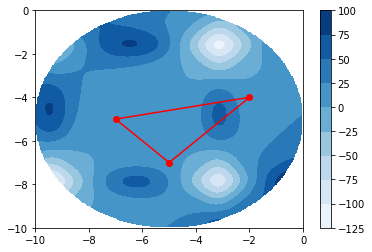

In [97]:
x = np.linspace(-10, 0, 200)
y = np.linspace(-10, 0, 200)
xx, yy = np.meshgrid(x, y)
X = np.concatenate([xx.reshape(-1, 1), yy.reshape(-1, 1)], axis = 1)

zz = f(X)

plt.contourf(xx, yy, zz.reshape(200, 200), cmap = plt.cm.Blues)
plt.colorbar()
plot_triangle(X0)

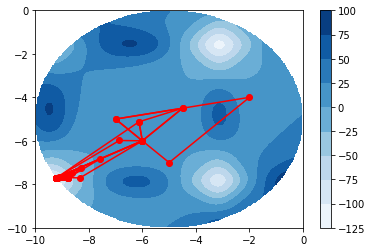

In [98]:
X = X0
F_min = []
F_min.append(np.min(f(X)))
plt.contourf(xx, yy, zz.reshape(200, 200), cmap = plt.cm.Blues)
plt.colorbar()
plot_triangle(X)
while np.max(np.std(X, axis = 0)) > 1e-3:
    X, f_min = nelder_mead_step(X, f)
    F_min.append(f_min) 
    plot_triangle(X)

In [8]:
print('X_0:', X0)
print('solution:', np.mean(X, axis = 0))

X_0: [[-7 -5]
 [-5 -7]
 [-2 -4]]
solution: [-9.20850903 -7.69934787]


Here is the minimal f(x) on each iteration. The stopping criterion is for the points to have small variance, which means that siplex is small enough

Text(0.5, 0, 'iter')

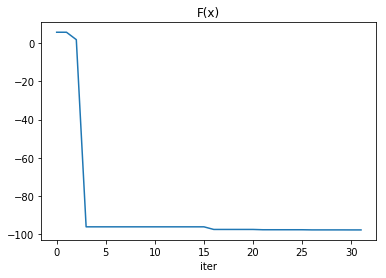

In [105]:
plt.plot(F_min)
plt.title('F(x)')
plt.xlabel('iter')

default parameters, X0 = [[-4, -1], [-6, -6], [-3, -7]]

In [24]:
X0 = np.array([[-4, -1], [-6, -6], [-3, -7]])

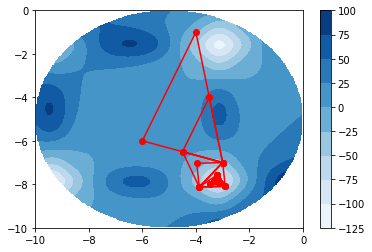

In [25]:
X = X0
F_min = []
F_min.append(np.min(f(X)))
plt.contourf(xx, yy, zz.reshape(200, 200), cmap = plt.cm.Blues)
plt.colorbar()
plot_triangle(X)
while np.max(np.std(X, axis = 0)) > 1e-3:
    X, f_min = nelder_mead_step(X, f)
    F_min.append(f_min) 
    plot_triangle(X)

In [26]:
print('X_0:', X0)
print('solution:', np.mean(X, axis = 0))

X_0: [[-4 -1]
 [-6 -6]
 [-3 -7]]
solution: [-3.17538004 -7.82013673]


parameters: alpha = 5, gamma = 0.7, beta = 3

previous X0 (X0 = [[-4, -1], [-6, -6], [-3, -7]])

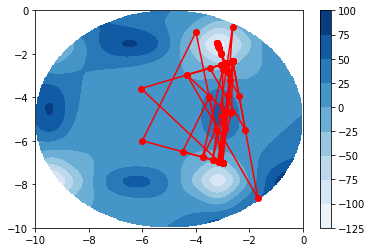

In [27]:
X = X0
F_min = []
F_min.append(np.min(f(X)))
plt.contourf(xx, yy, zz.reshape(200, 200), cmap = plt.cm.Blues)
plt.colorbar()
plot_triangle(X)
while np.max(np.std(X, axis = 0)) > 1e-3:
    X, f_min = nelder_mead_step(X, f, alpha = 5, gamma = 0.7, beta = 3)
    F_min.append(f_min) 
    plot_triangle(X)

In [28]:
print('X_0:', X0)
print('solution:', np.mean(X, axis = 0))

X_0: [[-4 -1]
 [-6 -6]
 [-3 -7]]
solution: [-3.17308044 -1.59615755]


Two initial simplexes for which algorithm converges to different minima (default parameters):
- (-7 -5), (-5 -7), (-2 -4)
- (-4 -1), (-6 -6), (-3 -7)


For the initial simplex (-4 -1), (-6 -6), (-3 -7) two sets of parameters for which algorithm converges to different minima:
- alpha = 1, beta = 0.5, gamma = 2 (default)
- alpha = 5, gamma = 0.7, beta = 3 (convergence is bad, but demonstrates that parameters affect the solution)

## Problem 4

In [85]:
def coordinate_descent_step(x0, oracle, k, gamma = 0.01, alpha = 0.01):
    n = x0.size
    i = k % n
    h = np.zeros_like(x0)
    h[i] = 1
    x = x0 - gamma*(oracle(x0 + alpha*h) - oracle(x0))/alpha*h
    return x, k+1, alpha/2

In [86]:
x0 = np.array([-3, -5])

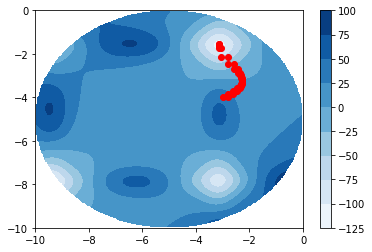

In [93]:
plt.contourf(xx, yy, zz.reshape(200, 200), cmap = plt.cm.Blues)
plt.colorbar()
x0 = np.array([-3, -4])
plt.scatter(x0[0], x0[1], c = 'r')
F = []
F.append(f(x0))
x_next, k, alpha = coordinate_descent_step(x0, f, 0)
plt.scatter(x_next[0], x_next[1], c = 'r')
F.append(f(x_next))
while np.linalg.norm(x_next - x0) > 1e-3:
    x0 = x_next
    x_next, k, alpha = coordinate_descent_step(x0, f, k, alpha)
    plt.scatter(x_next[0], x_next[1], c = 'r')
    F.append(f(x_next))

Here is the minimal f(x) on each iteration. The stopping criterion is small difference between the current x and previous one.

Text(0.5, 0, 'iter')

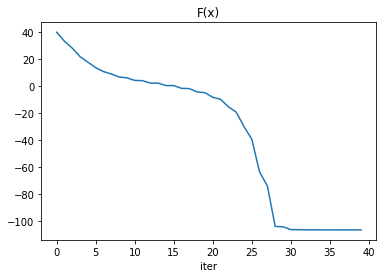

In [104]:
plt.plot(F)
plt.title('F(x)')
plt.xlabel('iter')

We can see that both methods took 30-40 iterations. On each iteration coordinate descent calls oracle 2 times, number of calls for the Nelder Mead method depends on the obtained values. Efficient implementation can take not less than 1 call per iteration. As our oracle is pretty simple, my implementation calculates at least 3 values per iteration. Still number of oracle calls and general complexity of the methods are comparable for this two methods.

But let's try coordinate descent from other initial point

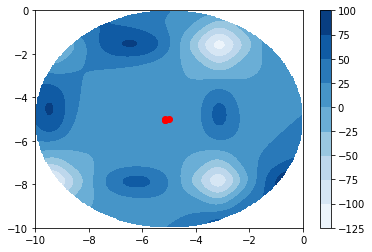

In [115]:
plt.contourf(xx, yy, zz.reshape(200, 200), cmap = plt.cm.Blues)
plt.colorbar()
x0 = np.array([-5, -5])
plt.scatter(x0[0], x0[1], c = 'r')
F = []
F.append(f(x0))
x_next, k, alpha = coordinate_descent_step(x0, f, 0, gamma = 0.1, alpha = 0.1)
plt.scatter(x_next[0], x_next[1], c = 'r')
F.append(f(x_next))
while np.linalg.norm(x_next - x0) > 1e-3:
    x0 = x_next
    x_next, k, alpha = coordinate_descent_step(x0, f, k, alpha)
    plt.scatter(x_next[0], x_next[1], c = 'r')
    F.append(f(x_next))

Text(0.5, 0, 'iter')

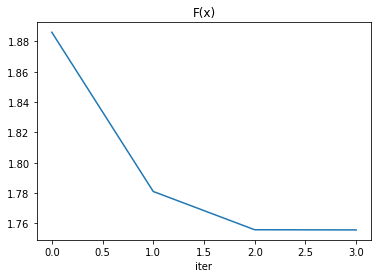

In [116]:
plt.plot(F)
plt.title('F(x)')
plt.xlabel('iter')

We can see that it converges very quickly but to some local minima. For the given function it seems to be a significant complication. In this case Nelder Mead method is a better choice as it has at least three points in initial simplex which allows it to avoid local minimas better than coordinate descent method. We can also use some other parameters and exit criterion for coordinate descent method, but to find parameters for given initial poin that will give good convergence (for coordinate descent) is another difficult task.